In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
IMAGE_SIZE = 28
CLASSES = ('blue', 'green', 'red')

In [3]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,
                 exist_ok = True)
MODEL_NAME = "ColorFinder.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

In [4]:
class ColorClass(nn.Module):
    def __init__(self, input_shape, out_shape, hidden_features):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels = input_shape,
                      out_channels = hidden_features, 
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            
            nn.Conv2d(in_channels = hidden_features,
                      out_channels = hidden_features, 
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 3)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_features * 81,
                      out_features = out_shape)
        )
        
    
    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x

In [5]:
model = ColorClass(input_shape = 3, out_shape = 3, hidden_features = 8)

In [6]:
model.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [7]:
data_transform = transforms.Compose([
    transforms.Resize(size = (IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor()
])

In [8]:
img = Image.open('pred.png')
img = data_transform(img)
img.unsqueeze_(0)
with torch.inference_mode():
    pred = model(img)
print(pred)
print(CLASSES[pred.argmax(dim=1)])

tensor([[-20.2718, -21.5210,  23.7227]])
red


In [9]:
with torch.inference_mode():
    pred += 50.0
    pred = pred.tolist()
    print(pred)
    

[[29.72821617126465, 28.479022979736328, 73.72272491455078]]


In [28]:
color = []
for ele in pred[0]:
    int(ele)
    color.insert(0, (ele/100))

In [29]:
img_pred = []
for i in range(28):
    line = []
    for j in range(28):
        line.append(color)
    img_pred.append(line)

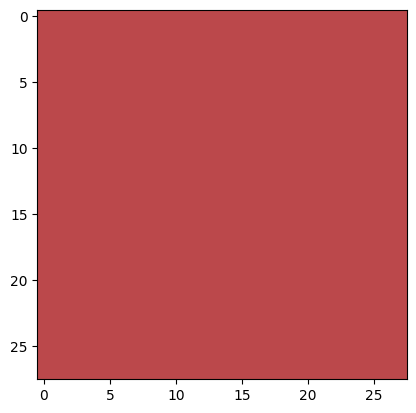

In [30]:
plt.imshow(img_pred)

In [ ]:
color = []
for ele in pred[0]:
    print(ele)
    color.append(ele*255/100)

29.72821617126465
28.479022979736328
73.72272491455078
